In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt

# Data Mining, Pre-processing & Exploration :

In [2]:
df = pd.read_csv("amazon_laptop_prices_v01.csv")
df.head()

,brand,model,screen_size,color,harddisk,cpu,ram,OS,special_features,graphics,graphics_coprocessor,cpu_speed,rating,price
0,ROKC,NaN,14 Inches,Blue,1000 GB,Intel Core i7,8 GB,Windows 11,NaN,Integrated,Intel,1.2 GHz,NaN,$589.99
1,HP,NaN,15.6 Inches,Silver,1000 GB,Intel Core i5,64 GB,Windows 11 Pro,Backlit Keyboard,Integrated,Intel,NaN,4.5,$999.99
2,MSI,Vector GP66 12UGS-267,15.66 Inches,Core Black,NaN,Intel Core i9,32 GB,Windows 11 Home,NaN,Dedicated,NaN,1.8 GHz,5.0,"$1,599.00"
3,Apple,MacBook Air,13.3 Inches,Silver,256 GB,Unknown,8 GB,Mac OS,Backlit Keyboard,Integrated,NaN,NaN,4.8,$689.99
4,Apple,MacBook Air,15.3 Inches,Midnight,256 GB,Unknown,8 GB,Mac OS,NaN,Integrated,NaN,NaN,4.8,"$1,144.48"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446 entries, 0 to 4445
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand                 4446 non-null   object 
 1   model                 3282 non-null   object 
 2   screen_size           4417 non-null   object 
 3   color                 3867 non-null   object 
 4   harddisk              3870 non-null   object 
 5   cpu                   4346 non-null   object 
 6   ram                   4385 non-null   object 
 7   OS                    4420 non-null   object 
 8   special_features      2054 non-null   object 
 9   graphics              4381 non-null   object 
 10  graphics_coprocessor  2574 non-null   object 
 11  cpu_speed             1520 non-null   object 
 12  rating                2174 non-null   float64
 13  price                 4441 non-null   object 
dtypes: float64(1), object(13)
memory usage: 486.4+ KB


In [4]:
df.isnull().sum()

brand                      0
model                   1164
screen_size               29
color                    579
harddisk                 576
cpu                      100
ram                       61
OS                        26
special_features        2392
graphics                  65
graphics_coprocessor    1872
cpu_speed               2926
rating                  2272
price                      5
dtype: int64

In [5]:
df.columns

Index(['brand', 'model', 'screen_size', 'color', 'harddisk', 'cpu', 'ram',
       'OS', 'special_features', 'graphics', 'graphics_coprocessor',
       'cpu_speed', 'rating', 'price'],
      dtype='object')

In [6]:
df["screen_size_inch"]=df['screen_size'].str.split(" ", expand = True)[0]

In [7]:
df.head()

,brand,model,screen_size,color,harddisk,cpu,ram,OS,special_features,graphics,graphics_coprocessor,cpu_speed,rating,price,screen_size_inch
0,ROKC,NaN,14 Inches,Blue,1000 GB,Intel Core i7,8 GB,Windows 11,NaN,Integrated,Intel,1.2 GHz,NaN,$589.99,14
1,HP,NaN,15.6 Inches,Silver,1000 GB,Intel Core i5,64 GB,Windows 11 Pro,Backlit Keyboard,Integrated,Intel,NaN,4.5,$999.99,15.6
2,MSI,Vector GP66 12UGS-267,15.66 Inches,Core Black,NaN,Intel Core i9,32 GB,Windows 11 Home,NaN,Dedicated,NaN,1.8 GHz,5.0,"$1,599.00",15.66
3,Apple,MacBook Air,13.3 Inches,Silver,256 GB,Unknown,8 GB,Mac OS,Backlit Keyboard,Integrated,NaN,NaN,4.8,$689.99,13.3
4,Apple,MacBook Air,15.3 Inches,Midnight,256 GB,Unknown,8 GB,Mac OS,NaN,Integrated,NaN,NaN,4.8,"$1,144.48",15.3


In [8]:
df['ram_GB'] = df['ram'].str.split(" ", expand = True)[0]
df.head()

,brand,model,screen_size,color,harddisk,cpu,ram,OS,special_features,graphics,graphics_coprocessor,cpu_speed,rating,price,screen_size_inch,ram_GB
0,ROKC,NaN,14 Inches,Blue,1000 GB,Intel Core i7,8 GB,Windows 11,NaN,Integrated,Intel,1.2 GHz,NaN,$589.99,14,8
1,HP,NaN,15.6 Inches,Silver,1000 GB,Intel Core i5,64 GB,Windows 11 Pro,Backlit Keyboard,Integrated,Intel,NaN,4.5,$999.99,15.6,64
2,MSI,Vector GP66 12UGS-267,15.66 Inches,Core Black,NaN,Intel Core i9,32 GB,Windows 11 Home,NaN,Dedicated,NaN,1.8 GHz,5.0,"$1,599.00",15.66,32
3,Apple,MacBook Air,13.3 Inches,Silver,256 GB,Unknown,8 GB,Mac OS,Backlit Keyboard,Integrated,NaN,NaN,4.8,$689.99,13.3,8
4,Apple,MacBook Air,15.3 Inches,Midnight,256 GB,Unknown,8 GB,Mac OS,NaN,Integrated,NaN,NaN,4.8,"$1,144.48",15.3,8


In [9]:
df["price_$"] = df["price"].str.split("$", expand = True)[1]
df.head()

,brand,model,screen_size,color,harddisk,cpu,ram,OS,special_features,graphics,graphics_coprocessor,cpu_speed,rating,price,screen_size_inch,ram_GB,price_$
0,ROKC,NaN,14 Inches,Blue,1000 GB,Intel Core i7,8 GB,Windows 11,NaN,Integrated,Intel,1.2 GHz,NaN,$589.99,14,8,589.99
1,HP,NaN,15.6 Inches,Silver,1000 GB,Intel Core i5,64 GB,Windows 11 Pro,Backlit Keyboard,Integrated,Intel,NaN,4.5,$999.99,15.6,64,999.99
2,MSI,Vector GP66 12UGS-267,15.66 Inches,Core Black,NaN,Intel Core i9,32 GB,Windows 11 Home,NaN,Dedicated,NaN,1.8 GHz,5.0,"$1,599.00",15.66,32,"1,599.00"
3,Apple,MacBook Air,13.3 Inches,Silver,256 GB,Unknown,8 GB,Mac OS,Backlit Keyboard,Integrated,NaN,NaN,4.8,$689.99,13.3,8,689.99
4,Apple,MacBook Air,15.3 Inches,Midnight,256 GB,Unknown,8 GB,Mac OS,NaN,Integrated,NaN,NaN,4.8,"$1,144.48",15.3,8,"1,144.48"


In [10]:
df["cpu_speed_GHz"] = df["cpu_speed"].str.split(" ", expand = True)[0]
df.head()

,brand,model,screen_size,color,harddisk,cpu,ram,OS,special_features,graphics,graphics_coprocessor,cpu_speed,rating,price,screen_size_inch,ram_GB,price_$,cpu_speed_GHz
0,ROKC,NaN,14 Inches,Blue,1000 GB,Intel Core i7,8 GB,Windows 11,NaN,Integrated,Intel,1.2 GHz,NaN,$589.99,14,8,589.99,1.2
1,HP,NaN,15.6 Inches,Silver,1000 GB,Intel Core i5,64 GB,Windows 11 Pro,Backlit Keyboard,Integrated,Intel,NaN,4.5,$999.99,15.6,64,999.99,NaN
2,MSI,Vector GP66 12UGS-267,15.66 Inches,Core Black,NaN,Intel Core i9,32 GB,Windows 11 Home,NaN,Dedicated,NaN,1.8 GHz,5.0,"$1,599.00",15.66,32,"1,599.00",1.8
3,Apple,MacBook Air,13.3 Inches,Silver,256 GB,Unknown,8 GB,Mac OS,Backlit Keyboard,Integrated,NaN,NaN,4.8,$689.99,13.3,8,689.99,NaN
4,Apple,MacBook Air,15.3 Inches,Midnight,256 GB,Unknown,8 GB,Mac OS,NaN,Integrated,NaN,NaN,4.8,"$1,144.48",15.3,8,"1,144.48",NaN


In [11]:
df["harddisk_GB"] = df["harddisk"].str.split(" ", expand = True)[0]
df.head()

,brand,model,screen_size,color,harddisk,cpu,ram,OS,special_features,graphics,graphics_coprocessor,cpu_speed,rating,price,screen_size_inch,ram_GB,price_$,cpu_speed_GHz,harddisk_GB
0,ROKC,NaN,14 Inches,Blue,1000 GB,Intel Core i7,8 GB,Windows 11,NaN,Integrated,Intel,1.2 GHz,NaN,$589.99,14,8,589.99,1.2,1000
1,HP,NaN,15.6 Inches,Silver,1000 GB,Intel Core i5,64 GB,Windows 11 Pro,Backlit Keyboard,Integrated,Intel,NaN,4.5,$999.99,15.6,64,999.99,NaN,1000
2,MSI,Vector GP66 12UGS-267,15.66 Inches,Core Black,NaN,Intel Core i9,32 GB,Windows 11 Home,NaN,Dedicated,NaN,1.8 GHz,5.0,"$1,599.00",15.66,32,"1,599.00",1.8,NaN
3,Apple,MacBook Air,13.3 Inches,Silver,256 GB,Unknown,8 GB,Mac OS,Backlit Keyboard,Integrated,NaN,NaN,4.8,$689.99,13.3,8,689.99,NaN,256
4,Apple,MacBook Air,15.3 Inches,Midnight,256 GB,Unknown,8 GB,Mac OS,NaN,Integrated,NaN,NaN,4.8,"$1,144.48",15.3,8,"1,144.48",NaN,256


In [12]:
df.columns

Index(['brand', 'model', 'screen_size', 'color', 'harddisk', 'cpu', 'ram',
       'OS', 'special_features', 'graphics', 'graphics_coprocessor',
       'cpu_speed', 'rating', 'price', 'screen_size_inch', 'ram_GB', 'price_$',
       'cpu_speed_GHz', 'harddisk_GB'],
      dtype='object')

In [13]:
comp_df = df[['brand', 'model', 'screen_size_inch', 'color', 'harddisk_GB', 'cpu', 'ram_GB',
       'OS', 'special_features', 'graphics', 'graphics_coprocessor',
       'cpu_speed_GHz', 'rating', 'price_$']].copy()
comp_df.head()

,brand,model,screen_size_inch,color,harddisk_GB,cpu,ram_GB,OS,special_features,graphics,graphics_coprocessor,cpu_speed_GHz,rating,price_$
0,ROKC,NaN,14,Blue,1000,Intel Core i7,8,Windows 11,NaN,Integrated,Intel,1.2,NaN,589.99
1,HP,NaN,15.6,Silver,1000,Intel Core i5,64,Windows 11 Pro,Backlit Keyboard,Integrated,Intel,NaN,4.5,999.99
2,MSI,Vector GP66 12UGS-267,15.66,Core Black,NaN,Intel Core i9,32,Windows 11 Home,NaN,Dedicated,NaN,1.8,5.0,"1,599.00"
3,Apple,MacBook Air,13.3,Silver,256,Unknown,8,Mac OS,Backlit Keyboard,Integrated,NaN,NaN,4.8,689.99
4,Apple,MacBook Air,15.3,Midnight,256,Unknown,8,Mac OS,NaN,Integrated,NaN,NaN,4.8,"1,144.48"


In [14]:
comp_df['price_$'] = comp_df['price_$'].str.replace(",","")
comp_df.head()

,brand,model,screen_size_inch,color,harddisk_GB,cpu,ram_GB,OS,special_features,graphics,graphics_coprocessor,cpu_speed_GHz,rating,price_$
0,ROKC,NaN,14,Blue,1000,Intel Core i7,8,Windows 11,NaN,Integrated,Intel,1.2,NaN,589.99
1,HP,NaN,15.6,Silver,1000,Intel Core i5,64,Windows 11 Pro,Backlit Keyboard,Integrated,Intel,NaN,4.5,999.99
2,MSI,Vector GP66 12UGS-267,15.66,Core Black,NaN,Intel Core i9,32,Windows 11 Home,NaN,Dedicated,NaN,1.8,5.0,1599.00
3,Apple,MacBook Air,13.3,Silver,256,Unknown,8,Mac OS,Backlit Keyboard,Integrated,NaN,NaN,4.8,689.99
4,Apple,MacBook Air,15.3,Midnight,256,Unknown,8,Mac OS,NaN,Integrated,NaN,NaN,4.8,1144.48


In [15]:
comp_df['screen_size_inch'] = comp_df['screen_size_inch'].astype(float)
comp_df['harddisk_GB'] = comp_df['harddisk_GB'].astype(float)
comp_df['ram_GB'] = comp_df['ram_GB'].astype(float)
comp_df['price_$'] = comp_df['price_$'].astype(float)
comp_df['cpu_speed_GHz'] = comp_df['cpu_speed_GHz'].str.replace(',', '').astype(float)
comp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446 entries, 0 to 4445
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand                 4446 non-null   object 
 1   model                 3282 non-null   object 
 2   screen_size_inch      4417 non-null   float64
 3   color                 3867 non-null   object 
 4   harddisk_GB           3870 non-null   float64
 5   cpu                   4346 non-null   object 
 6   ram_GB                4385 non-null   float64
 7   OS                    4420 non-null   object 
 8   special_features      2054 non-null   object 
 9   graphics              4381 non-null   object 
 10  graphics_coprocessor  2574 non-null   object 
 11  cpu_speed_GHz         1520 non-null   float64
 12  rating                2174 non-null   float64
 13  price_$               4441 non-null   float64
dtypes: float64(6), object(8)
memory usage: 486.4+ KB


In [16]:
comp_df.isnull().sum()

brand                      0
model                   1164
screen_size_inch          29
color                    579
harddisk_GB              576
cpu                      100
ram_GB                    61
OS                        26
special_features        2392
graphics                  65
graphics_coprocessor    1872
cpu_speed_GHz           2926
rating                  2272
price_$                    5
dtype: int64

In [17]:
#if comp_df['graphics_coprocessor'].str.contains("NaN"):
comp_df['model'].fillna("Unknown", inplace = True)
comp_df['color'].fillna("Unknown", inplace = True)
comp_df['cpu'].fillna("Unknown", inplace = True)
comp_df['OS'].fillna("Unknown", inplace = True)
comp_df['special_features'].fillna("Unknown", inplace = True)
comp_df['graphics'].fillna("Unknown", inplace = True)
comp_df['graphics_coprocessor'].fillna("Unknown", inplace=True)

comp_df.head()

,brand,model,screen_size_inch,color,harddisk_GB,cpu,ram_GB,OS,special_features,graphics,graphics_coprocessor,cpu_speed_GHz,rating,price_$
0,ROKC,Unknown,14.00,Blue,1000.0,Intel Core i7,8.0,Windows 11,Unknown,Integrated,Intel,1.2,NaN,589.99
1,HP,Unknown,15.60,Silver,1000.0,Intel Core i5,64.0,Windows 11 Pro,Backlit Keyboard,Integrated,Intel,NaN,4.5,999.99
2,MSI,Vector GP66 12UGS-267,15.66,Core Black,NaN,Intel Core i9,32.0,Windows 11 Home,Unknown,Dedicated,Unknown,1.8,5.0,1599.00
3,Apple,MacBook Air,13.30,Silver,256.0,Unknown,8.0,Mac OS,Backlit Keyboard,Integrated,Unknown,NaN,4.8,689.99
4,Apple,MacBook Air,15.30,Midnight,256.0,Unknown,8.0,Mac OS,Unknown,Integrated,Unknown,NaN,4.8,1144.48


In [18]:
comp_df.isnull().sum()

brand                      0
model                      0
screen_size_inch          29
color                      0
harddisk_GB              576
cpu                        0
ram_GB                    61
OS                         0
special_features           0
graphics                   0
graphics_coprocessor       0
cpu_speed_GHz           2926
rating                  2272
price_$                    5
dtype: int64

In [19]:
comp_df.describe()

,screen_size_inch,harddisk_GB,ram_GB,cpu_speed_GHz,rating,price_$
count,4417.000000,3870.000000,4385.000000,1520.000000,2174.000000,4441.000000
mean,15.074589,719.133959,23.965562,11.156717,4.086891,1189.330016
std,1.190357,802.328201,17.328353,253.715060,1.165337,826.022711
min,10.000000,1.000000,1.000000,0.900000,1.000000,57.990000
25%,14.000000,256.000000,16.000000,1.100000,4.000000,589.990000
50%,15.600000,512.000000,16.000000,1.200000,4.500000,999.990000
75%,15.600000,1000.000000,32.000000,1.800000,5.000000,1612.990000
max,27.000000,8000.000000,128.000000,9120.000000,5.000000,11261.240000


In [20]:
for columns in comp_df.columns:
    if comp_df[columns].isna().any():
        mean = comp_df[columns].mean()
        comp_df[columns].fillna(mean, inplace = True)

comp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446 entries, 0 to 4445
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand                 4446 non-null   object 
 1   model                 4446 non-null   object 
 2   screen_size_inch      4446 non-null   float64
 3   color                 4446 non-null   object 
 4   harddisk_GB           4446 non-null   float64
 5   cpu                   4446 non-null   object 
 6   ram_GB                4446 non-null   float64
 7   OS                    4446 non-null   object 
 8   special_features      4446 non-null   object 
 9   graphics              4446 non-null   object 
 10  graphics_coprocessor  4446 non-null   object 
 11  cpu_speed_GHz         4446 non-null   float64
 12  rating                4446 non-null   float64
 13  price_$               4446 non-null   float64
dtypes: float64(6), object(8)
memory usage: 486.4+ KB


In [21]:
comp_df.isnull().sum()

brand                   0
model                   0
screen_size_inch        0
color                   0
harddisk_GB             0
cpu                     0
ram_GB                  0
OS                      0
special_features        0
graphics                0
graphics_coprocessor    0
cpu_speed_GHz           0
rating                  0
price_$                 0
dtype: int64

In [22]:
for columns in comp_df.columns:
    if comp_df[columns].dtype == "float64":
        comp_df[columns] = comp_df[columns].astype("int32")
        
comp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446 entries, 0 to 4445
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   brand                 4446 non-null   object
 1   model                 4446 non-null   object
 2   screen_size_inch      4446 non-null   int32 
 3   color                 4446 non-null   object
 4   harddisk_GB           4446 non-null   int32 
 5   cpu                   4446 non-null   object
 6   ram_GB                4446 non-null   int32 
 7   OS                    4446 non-null   object
 8   special_features      4446 non-null   object
 9   graphics              4446 non-null   object
 10  graphics_coprocessor  4446 non-null   object
 11  cpu_speed_GHz         4446 non-null   int32 
 12  rating                4446 non-null   int32 
 13  price_$               4446 non-null   int32 
dtypes: int32(6), object(8)
memory usage: 382.2+ KB


In [23]:
comp_df.brand.value_counts()

Dell                             1581
HP                                804
ROKC                              637
MSI                               473
Lenovo                            308
ASUS                              160
DELL                              147
acer                              108
LG                                 39
Apple                              29
SAMSUNG                            23
Microsoft                          15
Alienware                          14
Panasonic                          12
Acer                               11
Gigabyte                           11
Toughbook                          11
hp                                  6
Razer                               6
LENOVO                              6
lenovo                              4
Latitude                            3
Luqeeg                              3
SHOXLAB                             2
CTL                                 2
Computer Upgrade King               2
dell        

In [24]:
for columns in comp_df.columns :
    if comp_df[columns].dtype == "object":
        comp_df[columns] = comp_df[columns].str.upper()
        
comp_df['brand'].value_counts()

DELL                             1730
HP                                810
ROKC                              637
MSI                               473
LENOVO                            318
ASUS                              163
ACER                              119
LG                                 39
APPLE                              29
SAMSUNG                            23
MICROSOFT                          15
ALIENWARE                          14
PANASONIC                          12
GIGABYTE                           11
TOUGHBOOK                          11
RAZER                               6
LUQEEG                              3
LATITUDE                            3
SHOXLAB                             2
CTL                                 2
COMPUTER UPGRADE KING               2
IVIEW                               2
QUALITY REFURBISHED COMPUTERS       2
GATEWAY                             2
XPG                                 1
MYTRIX                              1
JTD         

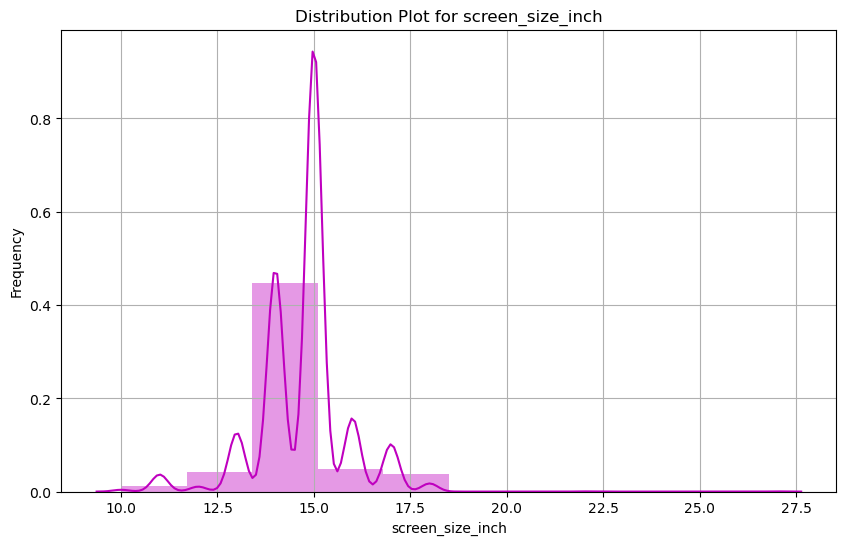

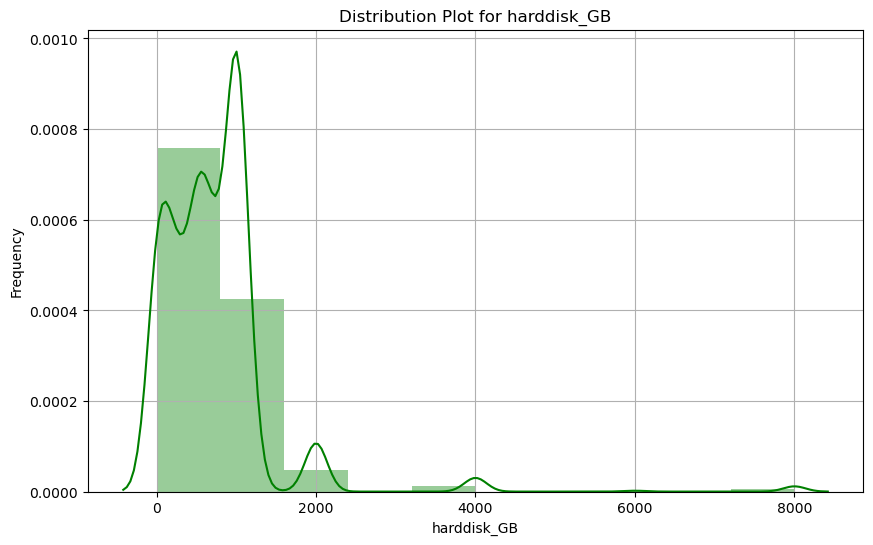

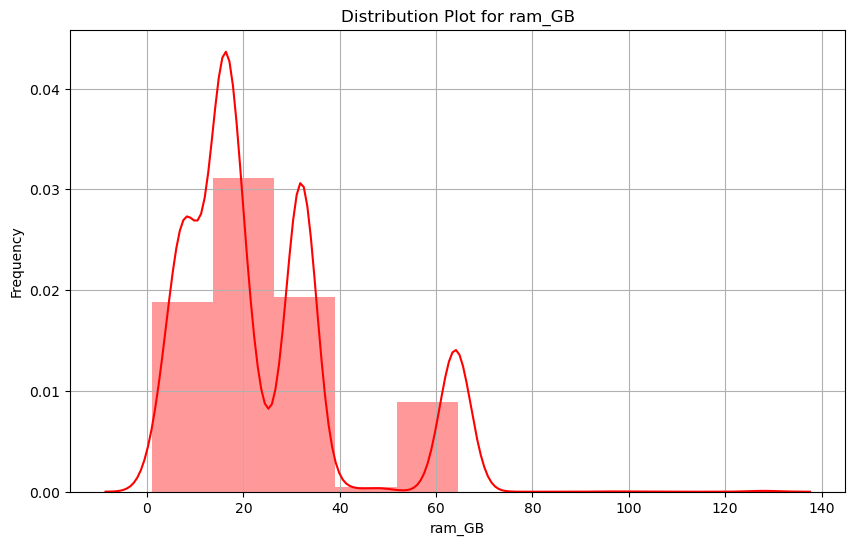

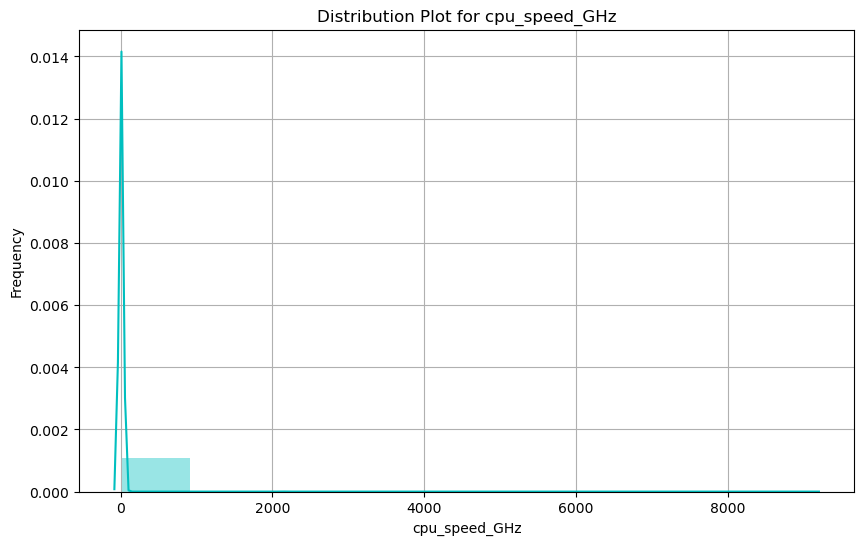

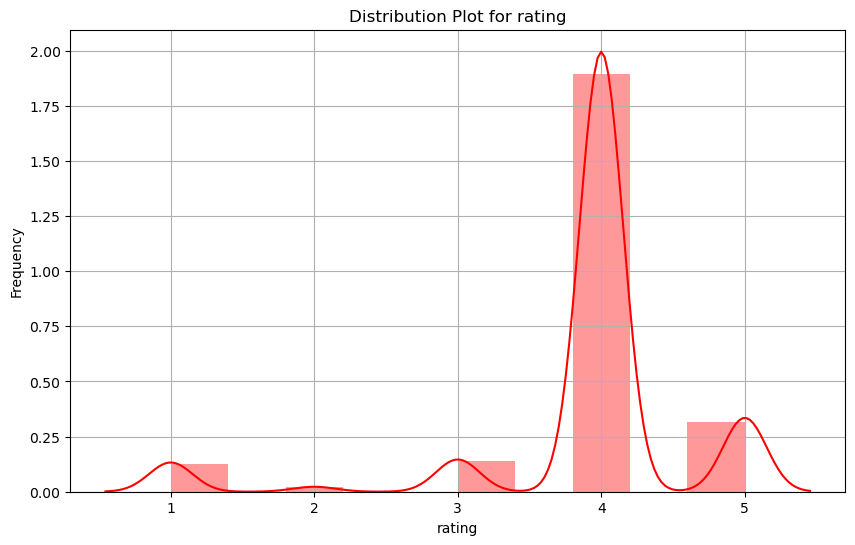

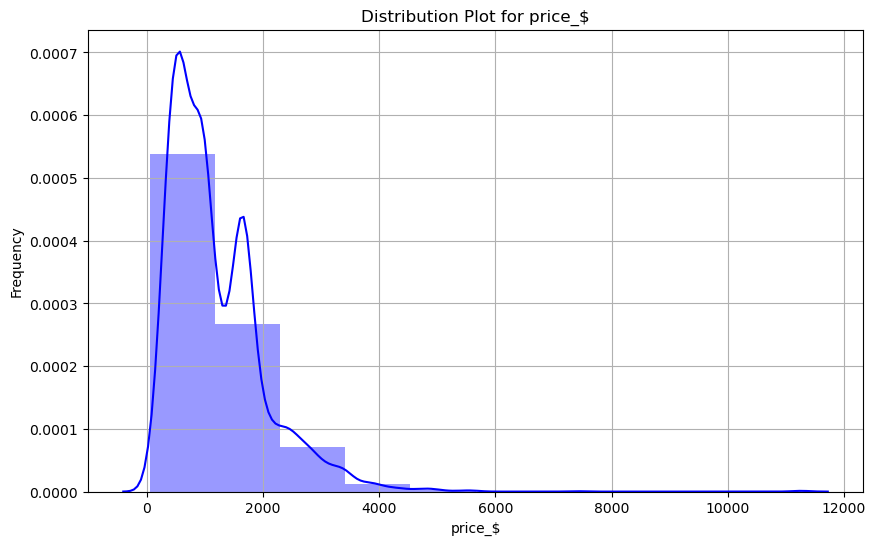

In [25]:
colours = ['r','b', 'm', 'y', 'g', 'c']

for i,col in enumerate(comp_df.columns):
    import warnings
    warnings.filterwarnings('ignore')
    if comp_df[col].dtype == "int32":
        plt.figure(figsize=(10,6))
        sns.distplot(comp_df[col], bins = 10, color = colours[i % len(colours)])
        plt.grid()
        plt.title(f'Distribution Plot for {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

In [26]:
comp_df.columns

Index(['brand', 'model', 'screen_size_inch', 'color', 'harddisk_GB', 'cpu',
       'ram_GB', 'OS', 'special_features', 'graphics', 'graphics_coprocessor',
       'cpu_speed_GHz', 'rating', 'price_$'],
      dtype='object')

# Exploratory Data Analysis :

In [27]:
print("First Five details of the dataset : \n", comp_df.head()) 

First Five details of the dataset : 
    brand                  model  screen_size_inch       color  harddisk_GB  \
0   ROKC                UNKNOWN                14        BLUE         1000   
1     HP                UNKNOWN                15      SILVER         1000   
2    MSI  VECTOR GP66 12UGS-267                15  CORE BLACK          719   
3  APPLE            MACBOOK AIR                13      SILVER          256   
4  APPLE            MACBOOK AIR                15    MIDNIGHT          256   

             cpu  ram_GB               OS  special_features    graphics  \
0  INTEL CORE I7       8       WINDOWS 11           UNKNOWN  INTEGRATED   
1  INTEL CORE I5      64   WINDOWS 11 PRO  BACKLIT KEYBOARD  INTEGRATED   
2  INTEL CORE I9      32  WINDOWS 11 HOME           UNKNOWN   DEDICATED   
3        UNKNOWN       8           MAC OS  BACKLIT KEYBOARD  INTEGRATED   
4        UNKNOWN       8           MAC OS           UNKNOWN  INTEGRATED   

  graphics_coprocessor  cpu_speed_GHz  rat

In [28]:
print("Last Five details of the dataset : \n", comp_df.tail()) 

Last Five details of the dataset : 
      brand                   model  screen_size_inch       color  harddisk_GB  \
4441   MSI  STEALTH GS66 12UGS-025                15  CORE BLACK          719   
4442  ROKC                 UNKNOWN                14        BLUE         1000   
4443  DELL    INSPIRON 3511 LAPTOP                15       BLACK          512   
4444  DELL    LATITUDE 3420 LAPTOP                14     UNKNOWN          512   
4445  DELL    LATITUDE 5430 LAPTOP                14       BLACK          256   

                cpu  ram_GB               OS  special_features    graphics  \
4441  INTEL CORE I9      32  WINDOWS 11 HOME           UNKNOWN   DEDICATED   
4442  INTEL CORE I7       8       WINDOWS 11           UNKNOWN  INTEGRATED   
4443        CORE I3       8  WINDOWS 10 HOME  WIFI & BLUETOOTH  INTEGRATED   
4444        CORE I5       8   WINDOWS 10 PRO           UNKNOWN  INTEGRATED   
4445        CORE I5      23   WINDOWS 11 PRO           UNKNOWN  INTEGRATED   

       

In [29]:
print("The number of rows and columns in the dataset is : {} and {}".format(comp_df.shape[0], comp_df.shape[1]))

The number of rows and columns in the dataset is : 4446 and 14


In [30]:
print("The descriptive statistics of the dataset is : \n", comp_df.describe(include = 'all'))

The descriptive statistics of the dataset is : 
        brand    model  screen_size_inch  color  harddisk_GB      cpu  \
count   4446     4446       4446.000000   4446  4446.000000     4446   
unique    42     1059               NaN    176          NaN      141   
top     DELL  UNKNOWN               NaN  BLACK          NaN  CORE I7   
freq    1730     1164               NaN   1172          NaN      828   
mean     NaN      NaN         14.731444    NaN   719.116284      NaN   
std      NaN      NaN          1.133332    NaN   748.541216      NaN   
min      NaN      NaN         10.000000    NaN     1.000000      NaN   
25%      NaN      NaN         14.000000    NaN   256.000000      NaN   
50%      NaN      NaN         15.000000    NaN   719.000000      NaN   
75%      NaN      NaN         15.000000    NaN  1000.000000      NaN   
max      NaN      NaN         27.000000    NaN  8000.000000      NaN   

             ram_GB          OS special_features    graphics  \
count   4446.000000   

In [31]:
#comp_df.to_csv("comp_df_backup.csv", index = False)

In [32]:
comp_df.brand.value_counts()

DELL                             1730
HP                                810
ROKC                              637
MSI                               473
LENOVO                            318
ASUS                              163
ACER                              119
LG                                 39
APPLE                              29
SAMSUNG                            23
MICROSOFT                          15
ALIENWARE                          14
PANASONIC                          12
GIGABYTE                           11
TOUGHBOOK                          11
RAZER                               6
LUQEEG                              3
LATITUDE                            3
SHOXLAB                             2
CTL                                 2
COMPUTER UPGRADE KING               2
IVIEW                               2
QUALITY REFURBISHED COMPUTERS       2
GATEWAY                             2
XPG                                 1
MYTRIX                              1
JTD         

### Seperating the laptop brands and exporting to a folder :
    

### Grouping and Pivot Table :

In [33]:
# Top 5 brands and OS based on the customer rating.

comp_df.groupby(['brand', 'OS']).agg({'price_$' : ['mean'], 'rating' : ['mean','count']}).sort_values(by = ('rating','count'), ascending = False).head(5)

price_$    rating      
                              mean      mean count
brand OS                                          
ROKC  WINDOWS 11        543.496855  4.276730   636
DELL  WINDOWS 11 PRO   1769.749495  3.995960   495
MSI   WINDOWS 11 HOME  1660.009732  3.072993   411
DELL  WINDOWS 11 HOME  1723.620253  3.994937   395
HP    WINDOWS 11        443.260606  4.003030   330

In [34]:
# Top 10 costly laptop brands based on average price :

comp_df.groupby(['brand', 'OS', 'graphics', 'ram_GB', 'harddisk_GB']).agg({'price_$' : 'mean'}).sort_values(by = ['price_$'], ascending = False).head(10)

,,,,,price_$
brand,OS,graphics,ram_GB,harddisk_GB,
DELL,WINDOWS 11 PRO,NVIDIA GEFORCE RTX 3050 TI,16,1000,11261.0
MSI,WINDOWS 10 PRO,DEDICATED,64,719,7399.0
RAZER,WINDOWS 11,RTX 3080 TI,32,1,5599.0
HP,WINDOWS 11 PRO,"RTX A5000,UHD GRAPHICS",64,1,5598.0
MSI,WINDOWS 11 PRO,INTEGRATED,32,2,5499.0
APPLE,MACOS 10.14 MOJAVE,INTEGRATED,96,4,5299.0
DELL,WINDOWS 10 HOME,NVIDIA RTX 2060,32,1,4999.0
HP,WINDOWS 10 PRO,"RTX A5000,UHD GRAPHICS",64,1,4999.0
BEST NOTEBOOKS,WINDOWS 11 PRO,DEDICATED,64,1,4999.0


### Looking futher at the Data for Modeling :

**Now let's have a look at the object type variables.**

In [35]:
comp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446 entries, 0 to 4445
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   brand                 4446 non-null   object
 1   model                 4446 non-null   object
 2   screen_size_inch      4446 non-null   int32 
 3   color                 4446 non-null   object
 4   harddisk_GB           4446 non-null   int32 
 5   cpu                   4446 non-null   object
 6   ram_GB                4446 non-null   int32 
 7   OS                    4446 non-null   object
 8   special_features      4446 non-null   object
 9   graphics              4446 non-null   object
 10  graphics_coprocessor  4446 non-null   object
 11  cpu_speed_GHz         4446 non-null   int32 
 12  rating                4446 non-null   int32 
 13  price_$               4446 non-null   int32 
dtypes: int32(6), object(8)
memory usage: 382.2+ KB


In [36]:
comp_df.brand.value_counts().keys()

Index(['DELL', 'HP', 'ROKC', 'MSI', 'LENOVO', 'ASUS', 'ACER', 'LG', 'APPLE',
       'SAMSUNG', 'MICROSOFT', 'ALIENWARE', 'PANASONIC', 'GIGABYTE',
       'TOUGHBOOK', 'RAZER', 'LUQEEG', 'LATITUDE', 'SHOXLAB', 'CTL',
       'COMPUTER UPGRADE KING', 'IVIEW', 'QUALITY REFURBISHED COMPUTERS',
       'GATEWAY', 'XPG', 'MYTRIX', 'JTD', 'XAMMUE', 'TOCOSY', 'MAINGEAR',
       'GIZPRO', 'ELO', 'MICROTELLA', 'CARLISLE FOODSERVICE PRODUCTS', 'VAIO',
       'CORSAIR', 'ONN', 'GOLDENGULF', 'LPT', 'BEST NOTEBOOKS', 'AWOW',
       'TOPOSH'],
      dtype='object')

In [37]:
comp_df.color.value_counts().keys()

Index(['BLACK', 'SILVER', 'UNKNOWN', 'BLUE', 'CORE BLACK', 'GRAY', 'ROSE GOLD',
       'PLATINUM SILVER', 'GREY', 'NATURAL SILVER',
       ...
       'BLACK AND SILVER', 'AI BLUE', 'RGB BACKLIT', 'BEIGE MOUSSE',
       'ECLIPSE GREY', 'SILVER/CARBON FIBER', 'ELECTRO PUNK', 'APOLLO',
       'THUNDER BALCK', 'ABYSSAL BLACK'],
      dtype='object', length=176)

In [38]:
comp_df.cpu.value_counts().keys()

Index(['CORE I7', 'CORE I5', 'INTEL CORE I5', 'INTEL CORE I9', 'INTEL CORE I7',
       'PENTIUM', 'PENTIUM N5000', 'CORE I7 FAMILY', 'CELERON N4000',
       'CORE I9',
       ...
       'CORE I5 2.3 GHZ', 'CORE I5-4210U', 'CORE I5 4310M',
       '1.2GHZ CORTEX A13 PROCESSOR', 'CORE I5 7200U',
       'A-SERIES DUAL-CORE A4-3300M', 'INTEL CORE I7-1355U', 'CORE I3 8130U',
       '68000', 'RYZEN 9 7900X'],
      dtype='object', length=141)

In [39]:
comp_df.OS.value_counts().keys()

Index(['WINDOWS 11', 'WINDOWS 11 HOME', 'WINDOWS 11 PRO', 'WINDOWS 10 PRO',
       'WINDOWS 10 HOME', 'WINDOWS 10', 'CHROME OS', 'UNKNOWN', 'MAC OS',
       'WINDOWS 7 PROFESSIONAL', 'WINDOWS 10 S', 'WINDOWS 11 S', 'WINDOWS 7',
       'WINDOWS 10 PRO 64 BIT MULTI-LANGUAGE SUPPORT ENGLISH/FRENCH/SPANISH',
       'WINDOWS 10 PRO 64 BIT-MULTI-LANGUAGE SUPPORT ENGLISH/FRENCH/SPANISH.',
       'WINDOWS 8', 'WINDOWS', 'MACOS 12 MONTEREY',
       'WINDOWS 10 PRO (ENGLISH/FRENCH/SPANISH)', 'WINDOWS 10 PRO 64-BIT',
       'WINDOWS 10 HOME 64', 'WINDOWS 11 PRO, WINDOWS', 'MACOS 10.12 SIERRA',
       'WINDOWS 8.1', 'MACOS 10.14 MOJAVE',
       'WIN 10 MULTI-LANGUAGE /FREE UPGRADE TO WIN 11', 'WINDOWS 11 HOME S',
       'WIN 10 PRO 64 BIT MULTI-LANGUAGE SUPPORT ENGLISH/FRENCH/SPANISH(RENEWED)',
       'WINDOWS PRO', 'LINUX',
       'WIN 10 PRO 64 BIT MULTI-LANGUAGE SUPPORT ENGLISH/FRENCH/SPANISH',
       'HP THINPRO', 'WINDOWS 10 DG WINDOWS 7 PRO 64', 'WIN 11 MULTI-HOME',
       'WINDOWS 8 PRO', '

In [40]:
comp_df.special_features.value_counts().keys()

Index(['UNKNOWN', 'WIFI & BLUETOOTH', 'BACKLIT KEYBOARD', 'ANTI-GLARE SCREEN',
       'ANTI-GLARE', 'ANTI GLARE COATING',
       'BACKLIT KEYBOARD,FINGERPRINT READER', 'FINGERPRINT READER',
       'INFORMATION NOT AVAILABLE',
       'HD AUDIO, BACKLIT KEYBOARD, ANTI GLARE COATING, NUMERIC KEYPAD',
       ...
       'BEZELS,DOLBY,STEREO SPEAKERS', 'FULL HD ANTI-GLARE', 'ACTIVE STYLUS',
       'WATER PROOF', 'ANTI-GLARE,BACKLIT KEYBOARD,NARROW BEZELS',
       'FHD TOUCH SCREEN', 'ANTI-GLARE,HD AUDIO',
       'FINGERPRINT READER, HD AUDIO, TRACKPOINT, BACKLIT KEYBOARD, ANTI GLARE COATING',
       'ANTI-REFLECTION, ANTI-SMUDGE, CORNING GORILLA GLASS, ANTI-GLARE SCREEN',
       'HD AUDIO, MEMORY CARD SLOT'],
      dtype='object', length=185)

In [41]:
comp_df.graphics.value_counts().keys()

Index(['INTEGRATED', 'DEDICATED', 'IRIS XE GRAPHICS', 'UNKNOWN',
       'NVIDIA GEFORCE RTX 4070', 'UHD GRAPHICS', 'NVIDIA GEFORCE RTX 3050 TI',
       'INTEGRATED, DEDICATED', 'NVIDIA RTX A3000', 'RADEON GRAPHICS',
       ...
       'NVIDIA GEFORCE RTX2060', 'GEFORCE RTX 3050 TI', 'NVIDIA RTX3070',
       'RTX 2060', 'T500,HD GRAPHICS, DEDICATED', 'NVIDIA GEFORCE RTX 2070',
       'INTEGRATED INTEL IRIS XE PLUS GPU', 'GEFORCE RTX 3080 TI',
       'GEFORCE RTX 3070 TI,IRIS XE GRAPHICS', 'SHARED, INTEGRATED'],
      dtype='object', length=110)

In [42]:
comp_df.graphics_coprocessor.value_counts().keys()

Index(['UNKNOWN', 'INTEL', 'NVIDIA GEFORCE RTX 3070', 'INTEL IRIS XE GRAPHICS',
       'INTEL INTEGRATED GRAPHICS', 'INTEL UHD GRAPHICS',
       'AMD RADEON GRAPHICS', 'INTEL UHD GRAPHICS 620',
       'NVIDIA GEFORCE RTX 3060', 'NVIDIA GEFORCE RTX 4070',
       ...
       'INTEL HD GRAPHICS;NVIDIA OPTIMUS GRAPHICS', 'AMD ATHLON',
       'INTEL HD INTEGRATED GRAPHICS', 'AMD RADEON HD 8790M',
       'AMD RADEON RX VEGA 10', 'AMD RADEON VEGA 9', 'DEDICATED',
       'INTEL HD 5500', 'AMD RADEON RTX 3070', 'NVIDIA GEFORCE'],
      dtype='object', length=206)

So, there are several varieties in the object variables. The important features for the modeling can be the integer type variables.

In [43]:
comp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446 entries, 0 to 4445
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   brand                 4446 non-null   object
 1   model                 4446 non-null   object
 2   screen_size_inch      4446 non-null   int32 
 3   color                 4446 non-null   object
 4   harddisk_GB           4446 non-null   int32 
 5   cpu                   4446 non-null   object
 6   ram_GB                4446 non-null   int32 
 7   OS                    4446 non-null   object
 8   special_features      4446 non-null   object
 9   graphics              4446 non-null   object
 10  graphics_coprocessor  4446 non-null   object
 11  cpu_speed_GHz         4446 non-null   int32 
 12  rating                4446 non-null   int32 
 13  price_$               4446 non-null   int32 
dtypes: int32(6), object(8)
memory usage: 382.2+ KB


In [44]:
comp_df.describe()

,screen_size_inch,harddisk_GB,ram_GB,cpu_speed_GHz,rating,price_$
count,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000
mean,14.731444,719.116284,23.952092,10.925776,3.903509,1188.659919
std,1.133332,748.541216,17.209310,148.324528,0.813221,825.675980
min,10.000000,1.000000,1.000000,0.000000,1.000000,57.000000
25%,14.000000,256.000000,16.000000,1.000000,4.000000,589.000000
50%,15.000000,719.000000,16.000000,11.000000,4.000000,999.000000
75%,15.000000,1000.000000,32.000000,11.000000,4.000000,1605.750000
max,27.000000,8000.000000,128.000000,9120.000000,5.000000,11261.000000


In [45]:
for columns in comp_df.columns:
    if comp_df[columns].dtype == "int32":
        comp_df[columns] = comp_df[columns].astype("float64")
        
comp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446 entries, 0 to 4445
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand                 4446 non-null   object 
 1   model                 4446 non-null   object 
 2   screen_size_inch      4446 non-null   float64
 3   color                 4446 non-null   object 
 4   harddisk_GB           4446 non-null   float64
 5   cpu                   4446 non-null   object 
 6   ram_GB                4446 non-null   float64
 7   OS                    4446 non-null   object 
 8   special_features      4446 non-null   object 
 9   graphics              4446 non-null   object 
 10  graphics_coprocessor  4446 non-null   object 
 11  cpu_speed_GHz         4446 non-null   float64
 12  rating                4446 non-null   float64
 13  price_$               4446 non-null   float64
dtypes: float64(6), object(8)
memory usage: 486.4+ KB


In [46]:
comp_df['OS'] = comp_df['OS'].astype(str)
for i, elem in enumerate(comp_df['OS']):
    if 'WINDOWS 11' in elem:  
        comp_df.loc[comp_df['OS'] == elem, 'OS'] = '0'  
    elif any(keyword in elem for keyword in ['WINDOWS 10','MAC OS', 'MACOS']):  
        comp_df.loc[comp_df['OS'] == elem, 'OS'] = '1'
    
comp_df.loc[comp_df['OS'].isin(['0', '1']) == False, 'OS'] = '2'
comp_df['OS'] = comp_df['OS'].astype("float64")        
comp_df['OS'].value_counts()

0.0    3113
1.0    1120
2.0     213
Name: OS, dtype: int64

In [47]:
comp_df['graphics'] = comp_df['graphics'].astype(str)
for i, elem in enumerate(comp_df['graphics']):
    if 'INTEGRATED' in elem:  
        comp_df.loc[comp_df['graphics'] == elem, 'graphics'] = '0'  
    elif any(keyword in elem for keyword in ['NVIDIA','DEDICATED']):  
        comp_df.loc[comp_df['graphics'] == elem, 'graphics'] = '1'
    
comp_df.loc[comp_df['graphics'].isin(['0', '1']) == False, 'graphics'] = '2'
comp_df['graphics'] = comp_df['graphics'].astype("float64")        
comp_df['graphics'].value_counts()

0.0    3054
1.0    1071
2.0     321
Name: graphics, dtype: int64

In [48]:
comp_df['cpu'] = comp_df['cpu'].astype(str)
for i, elem in enumerate(comp_df['cpu']):
    if 'CORE' in elem:  
        comp_df.loc[comp_df['cpu'] == elem, 'cpu'] = '0'  
    elif any(keyword in elem for keyword in ['INTEL','PENTIUM']):  
        comp_df.loc[comp_df['cpu'] == elem, 'cpu'] = '1'
    
comp_df.loc[comp_df['cpu'].isin(['0', '1']) == False, 'cpu'] = '2'
comp_df['cpu'] = comp_df['cpu'].astype("float64")        
comp_df['cpu'].value_counts()

0.0    3411
2.0     653
1.0     382
Name: cpu, dtype: int64

In [49]:
comp_df['color'] = comp_df['color'].astype(str)
for i, elem in enumerate(comp_df['color']):
    if 'BLA' in elem:  
        comp_df.loc[comp_df['color'] == elem, 'color'] = '0'  
    elif any(keyword in elem for keyword in ['BLU','GR']):  
        comp_df.loc[comp_df['color'] == elem, 'color'] = '1'
    
comp_df.loc[comp_df['color'].isin(['0', '1']) == False, 'color'] = '2'
comp_df['color'] = comp_df['color'].astype("float64")        
comp_df['color'].value_counts()

2.0    1773
0.0    1683
1.0     990
Name: color, dtype: int64

In [50]:
comp_df['brand'] = comp_df['brand'].astype(str)
for i, elem in enumerate(comp_df['brand']):
    if 'DELL' in elem:  
        comp_df.loc[comp_df['brand'] == elem, 'brand'] = '0'  
    elif any(keyword in elem for keyword in ['HP','ROKC', 'ASUS', 'ACER']):  
        comp_df.loc[comp_df['brand'] == elem, 'brand'] = '1'
    
comp_df.loc[comp_df['brand'].isin(['0', '1']) == False, 'brand'] = '2'
comp_df['brand'] = comp_df['brand'].astype("float64")        
comp_df['brand'].value_counts()

0.0    1730
1.0    1729
2.0     987
Name: brand, dtype: int64

In [51]:
comp_df['model'] = comp_df['model'].astype(str)
for i, elem in enumerate(comp_df['model']):
    if 'UNKNOWN' in elem:  
        comp_df.loc[comp_df['model'] == elem, 'model'] = '0'  
    elif any(keyword in elem for keyword in ['VECTOR','STEALTH', 'ISPIRATION', 'LATITUDE']):  
        comp_df.loc[comp_df['model'] == elem, 'model'] = '1'
    
comp_df.loc[comp_df['model'].isin(['0', '1']) == False, 'model'] = '2'
comp_df['model'] = comp_df['model'].astype("float64")        
comp_df['model'].value_counts()

2.0    2191
0.0    1164
1.0    1091
Name: model, dtype: int64

In [52]:
comp_df['graphics_coprocessor'] = comp_df['graphics_coprocessor'].astype(str)
for i, elem in enumerate(comp_df['graphics_coprocessor']):
    if 'UNKNOWN' in elem:  
        comp_df.loc[comp_df['graphics_coprocessor'] == elem, 'graphics_coprocessor'] = '0'  
    elif any(keyword in elem for keyword in ['INTEL', 'NVIDIA']):  
        comp_df.loc[comp_df['graphics_coprocessor'] == elem, 'graphics_coprocessor'] = '1'
    
comp_df.loc[comp_df['graphics_coprocessor'].isin(['0', '1']) == False, 'graphics_coprocessor'] = '2'
comp_df['graphics_coprocessor'] = comp_df['graphics_coprocessor'].astype("float64")        
comp_df['graphics_coprocessor'].value_counts()

1.0    2414
0.0    1872
2.0     160
Name: graphics_coprocessor, dtype: int64

In [53]:
comp_df['special_features'] = comp_df['special_features'].astype(str)
for i, elem in enumerate(comp_df['special_features']):
    if 'UNKNOWN' in elem:  
        comp_df.loc[comp_df['special_features'] == elem, 'special_features'] = '0'  
    elif any(keyword in elem for keyword in ['WIFI & BLUETOOTH', 'BACKLIT KEYBOARD']):  
        comp_df.loc[comp_df['special_features'] == elem, 'special_features'] = '1'
    
comp_df.loc[comp_df['special_features'].isin(['0', '1']) == False, 'special_features'] = '2'
comp_df['special_features'] = comp_df['special_features'].astype("float64")        
comp_df['special_features'].value_counts()

0.0    2392
1.0    1365
2.0     689
Name: special_features, dtype: int64

In [54]:
data = comp_df[["brand", "model", "screen_size_inch", "color", "harddisk_GB", "cpu", "ram_GB", "OS", "special_features", "graphics", "graphics_coprocessor", "cpu_speed_GHz", "rating", "price_$"]].copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446 entries, 0 to 4445
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand                 4446 non-null   float64
 1   model                 4446 non-null   float64
 2   screen_size_inch      4446 non-null   float64
 3   color                 4446 non-null   float64
 4   harddisk_GB           4446 non-null   float64
 5   cpu                   4446 non-null   float64
 6   ram_GB                4446 non-null   float64
 7   OS                    4446 non-null   float64
 8   special_features      4446 non-null   float64
 9   graphics              4446 non-null   float64
 10  graphics_coprocessor  4446 non-null   float64
 11  cpu_speed_GHz         4446 non-null   float64
 12  rating                4446 non-null   float64
 13  price_$               4446 non-null   float64
dtypes: float64(14)
memory usage: 486.4 KB


### Assumption Checking and Outliers Detection :

In [55]:
from scipy import stats
print("Skewness of data : \n", stats.skew(data))
print("Kurtosis of data : \n", stats.kurtosis(data))
print("Applying normality test : \n", stats.mstats.normaltest(data))
print("Applying Shapiro test :", stats.shapiro(data))

Skewness of data : 
 [ 2.91742489e-01 -4.55162204e-01 -1.02019272e-01 -3.93497329e-02
  4.88939671e+00  1.56694252e+00  1.36817328e+00  1.40006601e+00
  7.45235362e-01  1.36207530e+00  1.67361174e-01  5.50098921e+01
 -2.16630152e+00  2.13033823e+00]
Kurtosis of data : 
 [-1.23740880e+00 -1.42558879e+00  5.59220261e+00 -1.71173433e+00
  3.93146354e+01  7.16515951e-01  1.55948955e+00  9.66687555e-01
 -8.16477009e-01  7.17663473e-01 -8.54017202e-01  3.25540729e+03
  5.95337447e+00  1.23755470e+01]
Applying normality test : 
 NormaltestResult(statistic=masked_array(data=[5536.2236979380405, 37260.90116692318,
                   545.7685081983522, 19363.17899938502,
                   4475.880911124245, 1036.9426795991935,
                   980.4189745451349, 933.3200248204284,
                   736.6454915514887, 873.4868326318722,
                   504.2112991441472, 14551.135727881192,
                   2003.2853069668622, 2293.069591645389],
             mask=[False, False, False, F

In [56]:
from scipy import stats
zscore = np.abs(stats.zscore(data))
print("The z-score of the data is : \n", zscore)

The z-score of the data is : 
          brand     model  screen_size_inch     color  harddisk_GB       cpu  \
0     0.218835  1.470005          0.645465  0.022966     0.375284  0.521874   
1     0.218835  1.470005          0.236988  1.111555     0.375284  0.521874   
2     1.528311  0.275844          0.236988  1.157487     0.000155  0.521874   
3     1.528311  0.918317          1.527918  1.111555     0.618761  2.227239   
4     1.528311  0.918317          0.236988  1.111555     0.618761  2.227239   
...        ...       ...               ...       ...          ...       ...   
4441  1.528311  0.275844          0.236988  1.157487     0.000155  0.521874   
4442  0.218835  1.470005          0.645465  0.022966     0.375284  0.521874   
4443  1.090641  0.918317          0.236988  1.157487     0.276724  0.521874   
4444  1.090641  0.275844          0.645465  1.111555     0.276724  0.521874   
4445  1.090641  0.275844          0.645465  1.157487     0.618761  0.521874   

        ram_GB      

In [57]:
# Determing indexes where z-score > 3 :

outlierlist = np.where(zscore > 3) 
print("The indexes of outliers is : \n",outlierlist[0])
print("The number of outliers is : \n", len(outlierlist[0]))

The indexes of outliers is : 
 [  17   27   54   55   62   76   77   89   97  100  101  107  136  153
  179  184  189  201  227  228  267  318  373  373  381  383  387  388
  394  401  422  458  482  511  513  527  537  569  603  616  625  630
  635  657  667  678  699  705  705  734  753  767  771  816  817  837
  840  851  852  862  868  869  876  887  889  899  904  911  930  932
  959  968  992  999 1020 1030 1032 1039 1043 1054 1056 1083 1114 1123
 1153 1176 1178 1188 1196 1219 1221 1231 1234 1239 1241 1246 1248 1258
 1271 1274 1276 1286 1294 1297 1307 1325 1328 1337 1349 1355 1372 1388
 1393 1409 1416 1420 1423 1429 1431 1442 1445 1461 1464 1469 1473 1483
 1499 1506 1515 1530 1533 1553 1571 1578 1596 1601 1614 1632 1638 1652
 1660 1663 1669 1671 1689 1691 1697 1703 1722 1737 1742 1747 1771 1776
 1784 1789 1808 1816 1819 1831 1837 1844 1859 1868 1875 1877 1895 1906
 1915 1919 1926 1928 1933 1943 1945 1950 1964 1967 1980 1986 2006 2009
 2020 2027 2031 2038 2042 2049 2065 2083 2098 

In [58]:
data_new = data[(zscore < 3).all(axis = 1)]
print("Dimension after removing outliers :", data_new.shape)

Dimension after removing outliers : (4011, 14)


In [59]:
data_new.head()

,brand,model,screen_size_inch,color,harddisk_GB,cpu,ram_GB,OS,special_features,graphics,graphics_coprocessor,cpu_speed_GHz,rating,price_$
0,1.0,0.0,14.0,1.0,1000.0,0.0,8.0,0.0,0.0,0.0,1.0,1.0,4.0,589.0
1,1.0,0.0,15.0,2.0,1000.0,0.0,64.0,0.0,1.0,0.0,1.0,11.0,4.0,999.0
2,2.0,1.0,15.0,0.0,719.0,0.0,32.0,0.0,0.0,1.0,0.0,1.0,5.0,1599.0
3,2.0,2.0,13.0,2.0,256.0,2.0,8.0,1.0,1.0,0.0,0.0,11.0,4.0,689.0
4,2.0,2.0,15.0,2.0,256.0,2.0,8.0,1.0,0.0,0.0,0.0,11.0,4.0,1144.0


Clearly the normalisation or the standardization is needed, because the variables are not comparable to each other. But, before that, we need to split the dataset.

### Splitting the Dataset :

In [60]:
x = data_new.iloc[:, :-1].values
y = data_new.iloc[:, -1].values

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 1)

In [62]:
print(x_train)

[[ 1.  0. 15. ...  1.  1.  4.]
 [ 0.  1. 14. ...  1.  1.  4.]
 [ 0.  1. 14. ...  0. 11.  4.]
 ...
 [ 1.  0. 15. ...  1.  1.  5.]
 [ 1.  0. 15. ...  1.  1.  4.]
 [ 0.  1. 14. ...  1. 11.  4.]]


In [63]:
print(x_test)

[[ 0.  1. 15. ...  0. 11.  4.]
 [ 0.  2. 15. ...  0. 11.  5.]
 [ 2.  2. 15. ...  0. 11.  4.]
 ...
 [ 2.  2. 17. ...  0. 11.  3.]
 [ 0.  1. 14. ...  0. 11.  4.]
 [ 1.  0. 15. ...  1.  1.  4.]]


In [64]:
print(y_train)

[ 459.  389. 1229. ...  389.  459. 1713.]


In [65]:
print(y_test)

[ 861. 1799. 1029.  389. 1495. 1295.  849. 1199.  389. 1679.  639.  589.
 1249.  600. 1599. 2815. 1150.  459. 1715. 1227.  389.  289. 2999.  639.
  880.  639.  199.  589.  389. 1763. 1409. 3423.  639. 2199. 1898. 1589.
  449.  389. 1066. 2500.  459.  389.  389.  322. 2199.  913.  389.  561.
 1199. 1614.  739. 1637.  899.  319. 3599.  459.  899.  119.  459. 1311.
  925.  999.  389.  589.  639. 1910. 2611.  459. 1599. 1199.  589.  899.
  599.  849.  589.  639. 1699. 1023.  941.  589.  726.  749.  639.  999.
  899.  389.  988.  708. 1699.  999. 1999. 2296.  389. 2199. 1599.  589.
  660.  879. 1599.  389.  899. 2460. 2499. 1557. 1395. 1899.  878. 1561.
 1028.  999. 2700.  389. 1599.  310. 1462. 1683.  854.  749.  589.  965.
  999.  691.  589. 3378. 2301.  959.  589. 1599.  389.  459. 1685.  459.
 1599.  899. 1399.  389.  639.  548. 2815. 1900. 1470.  799. 1999.  459.
 3245. 1094. 1999. 1599. 1599. 2891. 1385.  135.  249. 1599.  699.  928.
  949.  109.  389. 1432.  951. 2249.  807. 1043.  5

Now the feature sclaing will be conducted. Here we follow the standarization that needs to be done only on the dependent variables.

### Feature Scaling :

In [66]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Random Forest Modeling :

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
data_forest = RandomForestRegressor(n_estimators = 20, random_state = 777)
data_forest.fit(x_train, y_train)
print('Accuracy of RF model on traing set : {}'.format(data_forest.score(x_train, y_train)))
forest_pred = data_forest.predict(x_test)

Accuracy of RF model on traing set : 0.9153747530590757


In [68]:
rmse = sqrt(mean_squared_error(forest_pred, y_test))
print("RMSE value for RF model : {}".format(rmse))

RMSE value for RF model : 376.3913081557426


In [69]:
from sklearn.metrics import r2_score
r_2 = r2_score(y_test, forest_pred)
print("Coefficient of determination is : %.2f" % r2_score(y_test, forest_pred))

Coefficient of determination is : 0.71


### RF with Hyperparameter Tuning :

In [70]:
print("--------------------Random Forest Model with Best Parameters--------------------")
from sklearn.model_selection import GridSearchCV
#x = RandomForestClassifier()
param_grid = {'max_features' : ["auto", "sqrt", "log2"], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500]}
data_forest_grid = RandomForestRegressor(random_state = 999)
data_forest_CV = GridSearchCV(estimator = data_forest_grid, param_grid = param_grid, cv = 15)
data_forest_result = data_forest_CV.fit(x_train, y_train)
print("Best Parameters : \n", data_forest_CV.best_params_)

--------------------Random Forest Model with Best Parameters--------------------
Best Parameters : 
 {'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 250}


In [71]:
data_forest_best = RandomForestRegressor(n_estimators=data_forest_result.best_params_['n_estimators'], max_depth=data_forest_result.best_params_['max_depth'],max_features=data_forest_result.best_params_['max_features'])

In [72]:
data_forest_best.fit(x_train, y_train)
print("Accuracy on training set with best parameters : ", data_forest_best.score(x_train, y_train))

Accuracy on training set with best parameters :  0.9091307936379269


In [73]:
forest_pred2 = data_forest_best.predict(x_test)
r_2 = r2_score(y_test, forest_pred2)
print("Coefficient of determination is : %.2f" % r2_score(y_test, forest_pred2))

Coefficient of determination is : 0.75


In [74]:
data_forest_best.feature_importances_

array([0.05462221, 0.07767573, 0.15182125, 0.03257713, 0.08313995,
       0.03468518, 0.17440243, 0.03873763, 0.03064026, 0.21101359,
       0.04007173, 0.04848684, 0.02212606])

In [75]:
data_new.columns[0:13]

Index(['brand', 'model', 'screen_size_inch', 'color', 'harddisk_GB', 'cpu',
       'ram_GB', 'OS', 'special_features', 'graphics', 'graphics_coprocessor',
       'cpu_speed_GHz', 'rating'],
      dtype='object')

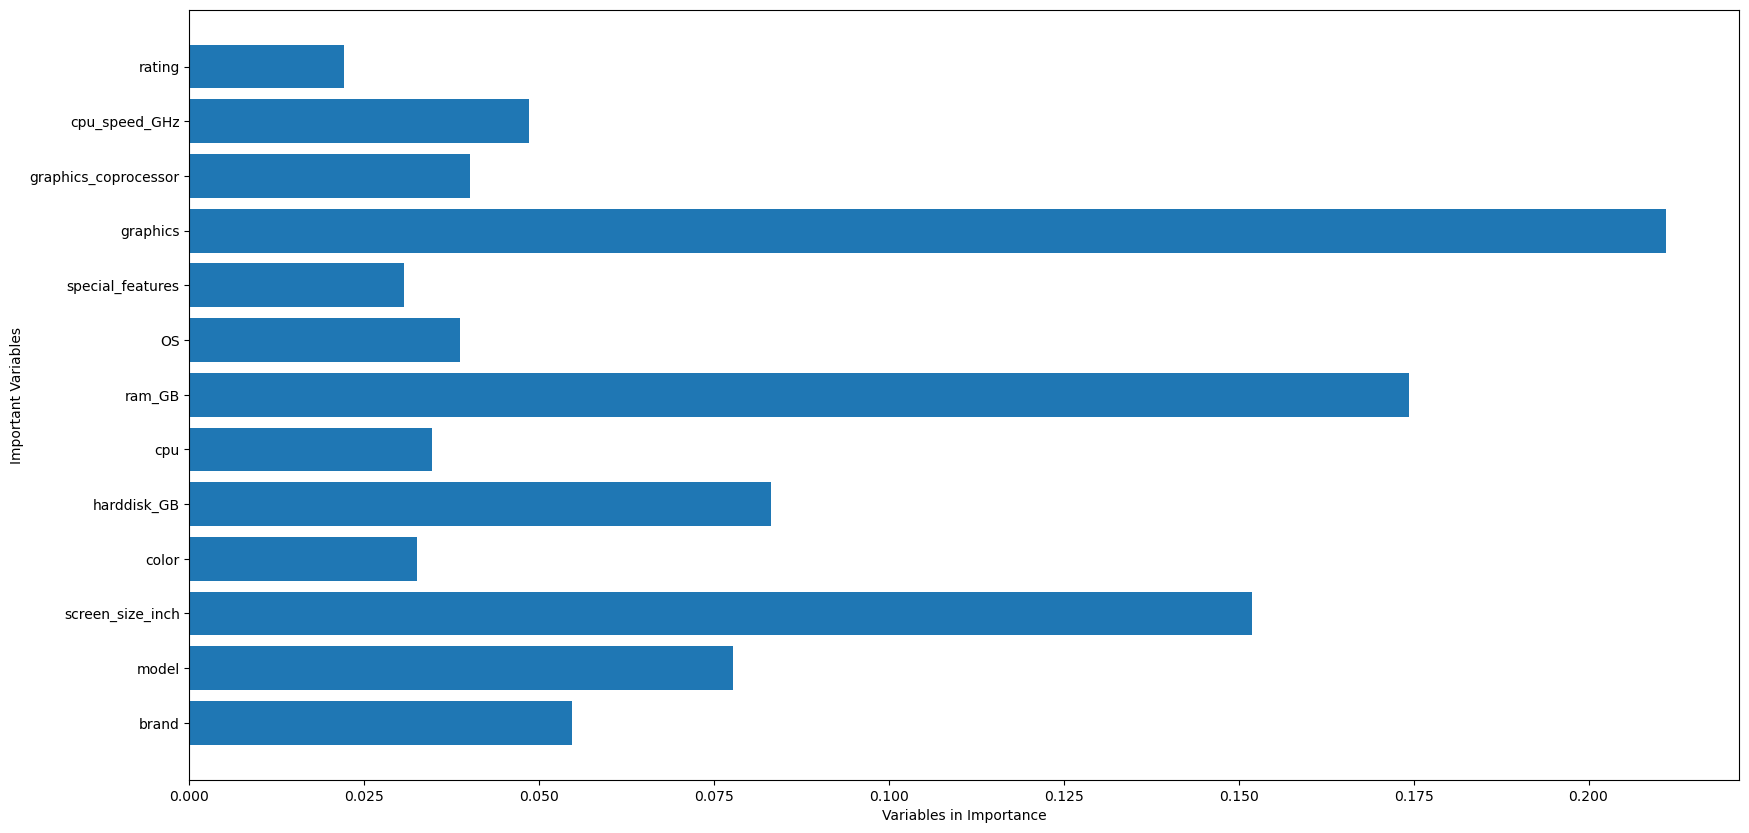

In [76]:
plt.figure(1, figsize = (20,10))
plt.yticks(range(0,13), data_new.columns[0:13])
plt.barh(range(0,13),data_forest_best.feature_importances_, align = 'center')
plt.xlabel("Variables in Importance")
plt.ylabel("Important Variables")
plt.show()

In [77]:
imp_var_value = pd.DataFrame((data_forest_best.feature_importances_.round(3))*100, columns=['Value of Importance'])
imp_var_name = data_new.columns[0:13]
important_features = pd.DataFrame({'Important Variables': imp_var_name, 'Value of Importance (%)': imp_var_value['Value of Importance']})
important_features = important_features.sort_values(by='Value of Importance (%)', ascending=False)
important_features.reset_index(drop=True, inplace=True)
print(important_features)
important_features.to_csv("Important Features.csv", index = False)

     Important Variables  Value of Importance (%)
0               graphics                     21.1
1                 ram_GB                     17.4
2       screen_size_inch                     15.2
3            harddisk_GB                      8.3
4                  model                      7.8
5                  brand                      5.5
6          cpu_speed_GHz                      4.8
7   graphics_coprocessor                      4.0
8                     OS                      3.9
9                    cpu                      3.5
10                 color                      3.3
11      special_features                      3.1
12                rating                      2.2


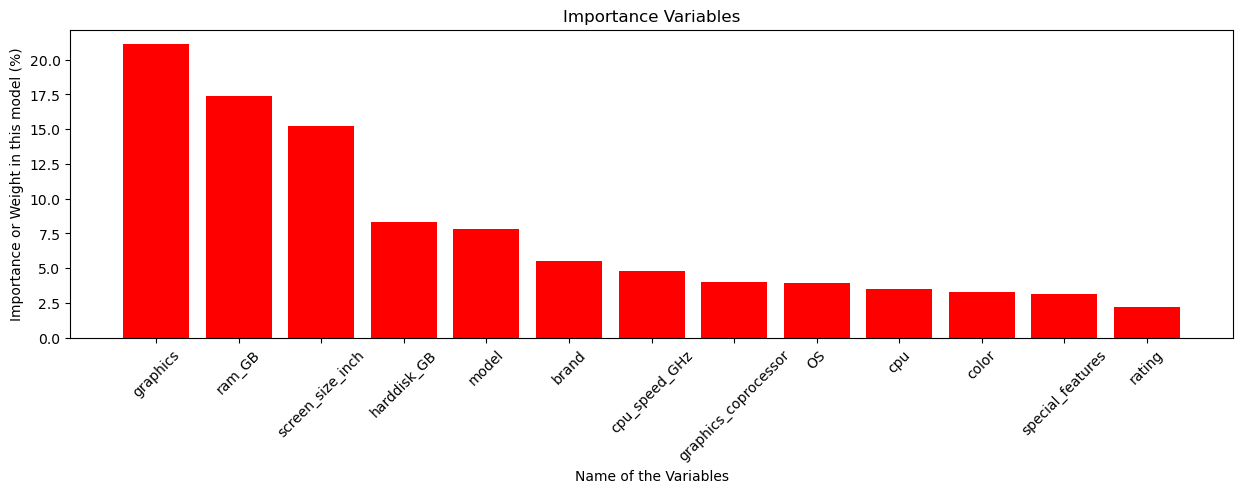

In [78]:
plt.figure(figsize=(15, 4))
plt.bar(important_features['Important Variables'], important_features['Value of Importance (%)'], color='red')
plt.xticks(rotation=45)
plt.xlabel('Name of the Variables')
plt.ylabel('Importance or Weight in this model (%)')
plt.title('Importance Variables')
plt.show()

### Tryring Linear Regression :

In [79]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
y_pred = lin_reg.predict(x_test)
r_2 = r2_score(y_test, y_pred)
print("Coefficient of determination is : %.2f" % r2_score(y_test, y_pred))

Coefficient of determination is : 0.50


In [80]:
data_new.head()

,brand,model,screen_size_inch,color,harddisk_GB,cpu,ram_GB,OS,special_features,graphics,graphics_coprocessor,cpu_speed_GHz,rating,price_$
0,1.0,0.0,14.0,1.0,1000.0,0.0,8.0,0.0,0.0,0.0,1.0,1.0,4.0,589.0
1,1.0,0.0,15.0,2.0,1000.0,0.0,64.0,0.0,1.0,0.0,1.0,11.0,4.0,999.0
2,2.0,1.0,15.0,0.0,719.0,0.0,32.0,0.0,0.0,1.0,0.0,1.0,5.0,1599.0
3,2.0,2.0,13.0,2.0,256.0,2.0,8.0,1.0,1.0,0.0,0.0,11.0,4.0,689.0
4,2.0,2.0,15.0,2.0,256.0,2.0,8.0,1.0,0.0,0.0,0.0,11.0,4.0,1144.0


In [81]:
#data_new1["price_$"] = data_new["price_$"]

In [82]:
ind = data_new.iloc[:, :-1]
dep = data_new.iloc[:, -1]

In [83]:
ind = ind.values
dep = dep.values

In [84]:
from sklearn.model_selection import train_test_split
ind_train, ind_test, dep_train, dep_test = train_test_split(ind, dep, test_size = 0.20, random_state = 1)

In [85]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
ind_train = sc.fit_transform(ind_train)
ind_test = sc.transform(ind_test)

In [86]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(ind_train, dep_train)
dep_pred = lin_reg.predict(ind_test)
r_2 = r2_score(dep_test, dep_pred)
print("Coefficient of determination is : %.2f" % r2_score(dep_test, dep_pred))

Coefficient of determination is : 0.50


In [87]:
print("--------------------MLRM Model with Best Parameters--------------------")
from sklearn.model_selection import GridSearchCV
param_grid = {'fit_intercept': [True, False],'copy_X': [True, False],'n_jobs': [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}
data_mlrm_grid = LinearRegression()
data_mlrm_CV = GridSearchCV(estimator = data_mlrm_grid, param_grid = param_grid, cv = 10)
data_mlrm_result = data_mlrm_CV.fit(ind_train, dep_train)
print("Best Parameters : \n", data_mlrm_CV.best_params_)

--------------------MLRM Model with Best Parameters--------------------
Best Parameters : 
 {'copy_X': True, 'fit_intercept': True, 'n_jobs': 3}


In [88]:
data_mlrm_best = LinearRegression(
    fit_intercept=data_mlrm_result.best_params_['fit_intercept'],
    copy_X=data_mlrm_result.best_params_['copy_X'],
    n_jobs=data_mlrm_result.best_params_['n_jobs']
)

In [89]:
data_mlrm_best.fit(ind_train, dep_train)
print("Accuracy on training set with best parameters : ", data_mlrm_best.score(ind_train, dep_train))

Accuracy on training set with best parameters :  0.48652350674992406


In [90]:
data_pred2 = data_mlrm_best.predict(ind_test)
r_2 = r2_score(dep_test, data_pred2)
print("Coefficient of determination is : %.2f" % r2_score(dep_test, data_pred2))

Coefficient of determination is : 0.50


### Trying ANN with Hyperparameter Tuning

In [91]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

X = data_new.iloc[:,:-1].values
y = data_new.iloc[:,-1].values



# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the base ANN model
def create_model():
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create a KerasRegressor based on the base model
model = KerasRegressor(build_fn=create_model, verbose=0)

# Define the grid search parameters
param_grid = {
    'epochs': [50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'batch_size': [32, 64, 128, 256],
}

# Create Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Create and fit the grid search with early stopping
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_result = grid.fit(X_train_scaled, y_train, validation_split=0.2, callbacks=[early_stopping])

# Print the best parameters and best score
print("Best Parameters: ", grid_result.best_params_)
print("Best Score: ", -grid_result.best_score_)

# Evaluate the best model on the test set
best_model = grid_result.best_estimator_
y_pred = best_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print("Test MSE:", mse)
print("Test R-squared:", r_squared)

2024-03-14 21:12:41.786164: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Best Parameters:  {'batch_size': 64, 'epochs': 900}
Best Score:  178792.22750258286
Test MSE: 206342.34560602024
Test R-squared: 0.6196354153409456
